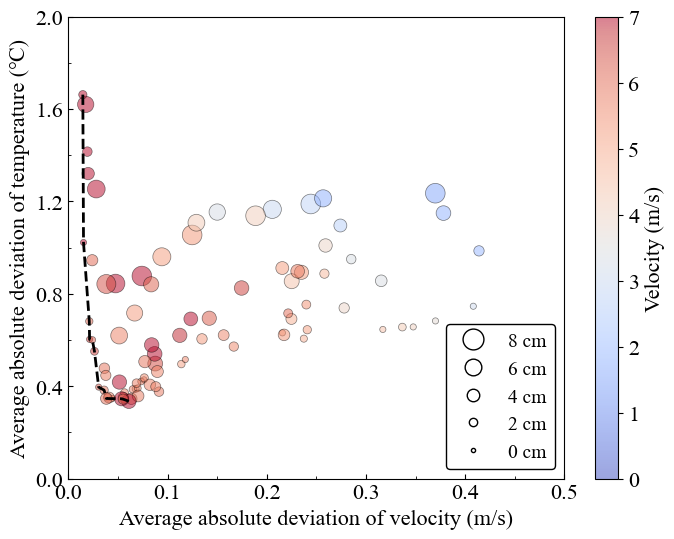

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker
import matplotlib.colors
import numpy as np

# ==== 帕累托前沿计算函数 ====
def is_pareto_efficient(costs):
    """
    识别帕累托最优点（目标越小越好）
    输入:
        costs: ndarray, 每行是一个点的目标值 [SD_T, SD_magU]
    返回:
        mask: 布尔数组，True 表示是帕累托最优点
    """
    is_efficient = np.ones(costs.shape[0], dtype=bool)
    for i, c in enumerate(costs):
        if is_efficient[i]:
            is_efficient[is_efficient] = np.any(costs[is_efficient] < c, axis=1) | np.all(costs[is_efficient] == c, axis=1)
            is_efficient[i] = True
    return is_efficient

# ==== 读取数据 ====
data = pd.read_excel('results.xlsx')

# ==== 提取变量 ====
x = data['SD_T']
y = data['SD_magU'] * 2  # 假设此为目标项放缩
colors = data['inletVelocity']
sizes = 15 - data['height']

# 帕累托点识别
objectives = np.vstack([x, y]).T
pareto_mask = is_pareto_efficient(objectives)
non_pareto_mask = ~pareto_mask

# 帕累托点坐标（用于连线）
pareto_points = objectives[pareto_mask]
pareto_points = pareto_points[np.argsort(pareto_points[:, 0])]  # 按 x 排序

# ==== 绘图 ====
plt.figure(figsize=(8, 6))

# 设置坐标范围与刻度
plt.xlim(0, 0.5)
plt.ylim(0, 2.0)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
plt.yticks([0, 0.4, 0.8, 1.2, 1.6, 2.0])
ax = plt.gca()
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.2))

# 字体设置
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# ==== 绘制非帕累托点（空心） ====
sc_nonpareto = plt.scatter(
    x[non_pareto_mask],
    y[non_pareto_mask],
    c=colors[non_pareto_mask],
    s=sizes[non_pareto_mask] * 20,
    cmap='coolwarm',
    alpha=0.5,
    edgecolor='black',
    lw=0.5,
    facecolors='none',
    norm=matplotlib.colors.Normalize(vmin=0, vmax=7)
)

# ==== 绘制帕累托点（实心） ====
sc_pareto = plt.scatter(
    x[pareto_mask],
    y[pareto_mask],
    c=colors[pareto_mask],
    s=sizes[pareto_mask] * 20,
    cmap='coolwarm',
    alpha=0.5,
    edgecolor='black',
    lw=0.5,
    norm=matplotlib.colors.Normalize(vmin=0, vmax=7)
)

# ==== 绘制帕累托前沿虚线 ====
plt.plot(
    pareto_points[:, 0],
    pareto_points[:, 1],
    color='black',
    linestyle='--',
    linewidth=2,
    label='Pareto front'
)

# ==== 颜色条 ====
cbar = plt.colorbar(sc_pareto, label='Velocity (m/s)')

# ==== 标签 ====
plt.xlabel('Average absolute deviation of velocity (m/s)', fontsize=16)
plt.ylabel('Average absolute deviation of temperature (℃)', fontsize=16)
plt.tick_params(which='both', direction='in')

# ==== 图例（点大小说明）====
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='8 cm', markerfacecolor='none', markeredgecolor='black', markersize=15),
    Line2D([0], [0], marker='o', color='w', label='6 cm', markerfacecolor='none', markeredgecolor='black', markersize=12),
    Line2D([0], [0], marker='o', color='w', label='4 cm', markerfacecolor='none', markeredgecolor='black', markersize=9),
    Line2D([0], [0], marker='o', color='w', label='2 cm', markerfacecolor='none', markeredgecolor='black', markersize=6),
    Line2D([0], [0], marker='o', color='w', label='0 cm', markerfacecolor='none', markeredgecolor='black', markersize=3),
]

leg = plt.legend(handles=legend_elements, fontsize=14, framealpha=1, loc='lower right', bbox_to_anchor=(1, 0))
leg.get_frame().set_edgecolor('black')

# ==== 保存与展示 ====
plt.savefig('scatter_pareto_solid_hollow.tiff', dpi=300, bbox_inches='tight')
plt.show()